## Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):


### Confidence Intervals:
1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?

### Chi-squared tests:
4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy


## Coin flip method

from lecture


In [28]:
from scipy import stats


import numpy as np
coinflips = np.random.binomial(n=1, p=.5, size=50)
coinflips

array([0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0])

In [29]:
np.mean(coinflips)

0.46

In [30]:
# NumPy by default, calculates what's called the "Population standard deviation"

sigma = np.std(coinflips)

sigma

0.49839743177508455

In [31]:
# We want the SAMPLE standard deviation

s = np.std(coinflips, ddof=1)

s

0.5034574339058886

In [33]:
confidence_level = .95

(1 + confidence_level) / 2

0.975

In [0]:
def confidence_interval(data, confidence=0.95):
  """
  Calculate a confidence interval around a sample mean for given data.
  Using t-distribution and two-tailed test, default 95% confidence. 
  
  Arguments:
    data - iterable (list or numpy array) of sample observations
    confidence - level of confidence for the interval
  
  Returns:
    tuple of (mean, lower bound, upper bound)
  """
  data = np.array(data)
  x_bar = np.mean(data)
  n = len(data)
  s = np.std(data, ddof=1)
  std_err = s / np.sqrt(n)
  t = stats.t.ppf((1 + confidence) / 2.0, n - 1)
  margin_of_error = t*std_err
  lower_bound = x_bar - margin_of_error
  upper_bound = x_bar + margin_of_error
  return (lower_bound, x_bar, upper_bound)

In [62]:
coinflips = np.random.binomial(n=1, p=.5, size=50)
confidence_interval(coinflips)

(0.13407592661147913, 0.26, 0.38592407338852086)

### Graph it

In [41]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.DataFrame({'coinflips': coinflips})

df.head()

,coinflips
0,1
1,0
2,0
3,0
4,0


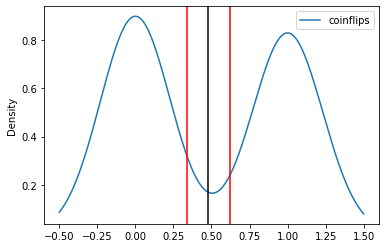

In [42]:
# The confidence interval does NOT capture 95% of the data in our sample

lower, mean, upper = confidence_interval(coinflips)

df.plot.density()
plt.axvline(x=lower, color='red')
plt.axvline(x=mean, color='black')
plt.axvline(x=upper, color='red')
plt.show()

In [43]:
lower, mean, upper = confidence_interval(coinflips)
moe = upper - mean
moe

0.14342620933732686

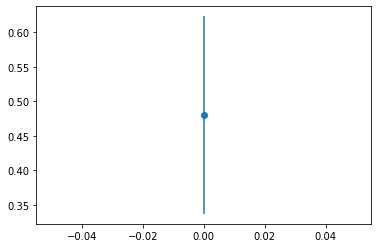

In [44]:
plt.errorbar(0, mean, yerr=moe, fmt='o')
plt.show()

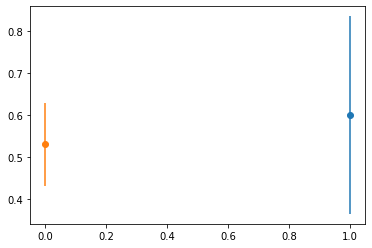

In [45]:
## comparing multiple confidence intervals
coinflips1 = np.random.binomial(n=1, p=.5, size=100)
coinflips2 = np.random.binomial(n=1, p=.5, size=20)

lower1, mean1, upper1 = confidence_interval(coinflips1)
lower2, mean2, upper2 = confidence_interval(coinflips2)

moe1 = upper1 - mean1
moe2 = upper2 - mean2

plt.errorbar(1, mean2, yerr=moe2, fmt='o')
plt.errorbar(0, mean1, yerr=moe1, fmt='o')
plt.show()


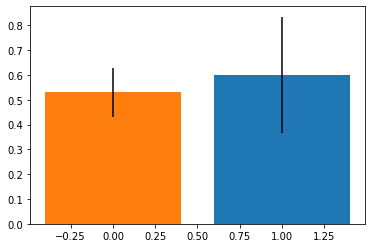

In [46]:
plt.bar(1, mean2, yerr=moe2)
plt.bar(0, mean1, yerr=moe1)
plt.show()

# Confidence voting records

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats


Data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data'

headers = ['Class-Name',
           'Handicapped-infants',
           'Water-project-cost-sharing',
           'Adoption-of-budget-resolution',
           'Physician-fee-freeze',
           'El-savador-aid',
           'Religious-groups-in-schools',
           'Anti-satellite-test-ban',
           'Aid-to-nicaraguan-contras',
           'Mx-missle',
           'Immigration',
           'Synfuels-corporation-cutback',
           'Education-spending',
           'Superfund-right-to-sue',
           'Crime',
           'Duty-free-exports',
           'Export-administration-act-south-africa'
           ]

df = pd.read_csv(Data_url, names=headers)

df


,Class-Name,Handicapped-infants,Water-project-cost-sharing,Adoption-of-budget-resolution,Physician-fee-freeze,El-savador-aid,Religious-groups-in-schools,Anti-satellite-test-ban,Aid-to-nicaraguan-contras,Mx-missle,Immigration,Synfuels-corporation-cutback,Education-spending,Superfund-right-to-sue,Crime,Duty-free-exports,Export-administration-act-south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,republican,n,n,y,y,y,y,n,n,y,y,n,y,y,y,n,y
431,democrat,n,n,y,n,n,n,y,y,y,y,n,n,n,n,n,y
432,republican,n,?,n,y,y,y,n,n,n,n,y,y,y,y,n,y
433,republican,n,n,n,y,y,y,?,?,?,?,n,y,y,y,n,y


In [0]:
def confidence_interval(data, confidence=0.95):
  """
  Calculate a confidence interval around a sample mean for given data.
  Using t-distribution and two-tailed test, default 95% confidence. 
  
  Arguments:
    data - iterable (list or numpy array) of sample observations
    confidence - level of confidence for the interval
  
  Returns:
    tuple of (mean, lower bound, upper bound)
  """
  data = np.array(data)
  x_bar = np.mean(data)
  n = len(data)
  s = np.std(data, ddof=1)
  std_err = s / np.sqrt(n)
  t = stats.t.ppf((1 + confidence) / 2.0, n - 1)
  margin_of_error = t*std_err
  lower_bound = x_bar - margin_of_error
  upper_bound = x_bar + margin_of_error
  return (lower_bound, x_bar, upper_bound)

In [3]:


df = df.replace({'y': 1, 'n': 0, "?": np.NaN})

df.head()



,Class-Name,Handicapped-infants,Water-project-cost-sharing,Adoption-of-budget-resolution,Physician-fee-freeze,El-savador-aid,Religious-groups-in-schools,Anti-satellite-test-ban,Aid-to-nicaraguan-contras,Mx-missle,Immigration,Synfuels-corporation-cutback,Education-spending,Superfund-right-to-sue,Crime,Duty-free-exports,Export-administration-act-south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


In [6]:


Get_votes = lambda x,y : df[df['Class-Name'] == x][y].dropna()
Get_votes('democrat', 'Handicapped-infants')



3      0.0
4      1.0
5      0.0
6      0.0
9      1.0
      ... 
424    0.0
425    0.0
426    1.0
429    1.0
431    0.0
Name: Handicapped-infants, Length: 258, dtype: float64

In [7]:
Imm_list = df['Immigration'].dropna(how='all').tolist()
Imm_list


[1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0

In [8]:
new = pd.DataFrame({'test': Imm_list})
new

,test
0,1.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
423,1.0
424,1.0
425,1.0
426,0.0


In [26]:
confidence_interval(new)

(0.45711551746571655, 0.5046728971962616, 0.5522302769268067)

# Graphic confidence

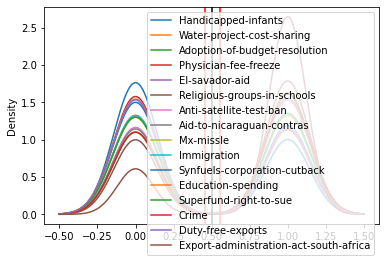

In [27]:
lower, mean, upper = confidence_interval(new)

df.plot.density()

plt.axvline(x=lower, color='red')
plt.axvline(x=mean, color='black')
plt.axvline(x=upper, color='red')
plt.show()

# ???????????????????????????????????????????

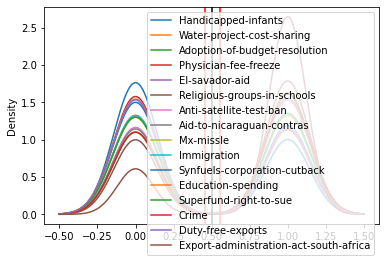

In [28]:
def build_me():

  def confidence_interval(data, confidence=0.95):
    """
    Calculate a confidence interval around a sample mean for given data.
    Using t-distribution and two-tailed test, default 95% confidence. 
    
    Arguments:
      data - iterable (list or numpy array) of sample observations
      confidence - level of confidence for the interval
    
    Returns:
      tuple of (mean, lower bound, upper bound)
    """
    data = np.array(data)
    x_bar = np.mean(data)
    n = len(data)
    s = np.std(data, ddof=1)
    std_err = s / np.sqrt(n)
    t = stats.t.ppf((1 + confidence) / 2.0, n - 1)
    margin_of_error = t*std_err
    lower_bound = x_bar - margin_of_error
    upper_bound = x_bar + margin_of_error
    return (lower_bound, x_bar, upper_bound)

  # Gets issue value
  Imm_list = df["Immigration"].dropna(how='all').tolist()

  conf = confidence_interval(Imm_list)

  lower, mean, upper = confidence_interval(Imm_list)

  df.plot.kde()

  plt.axvline(x=lower, color='red')
  plt.axvline(x=mean, color='black')
  plt.axvline(x=upper, color='red')
  return plt.show()

build_me()
  


## Stretch goals:

1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).
2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.
3. Refactor your code so it is elegant, readable, and can be easily run for all issues.

In [68]:
!pip install qiskit

     |████████████████████████████████| 6.7MB 4.0MB/s 
     |████████████████████████████████| 23.4MB 90kB/s 
     |████████████████████████████████| 163kB 46.4MB/s 
     |████████████████████████████████| 174kB 52.2MB/s 
     |████████████████████████████████| 1.9MB 43.7MB/s 
     |████████████████████████████████| 51kB 7.2MB/s 
     |████████████████████████████████| 768kB 47.0MB/s 
     |████████████████████████████████| 5.6MB 48.4MB/s 
     |████████████████████████████████| 51kB 6.9MB/s 
     |████████████████████████████████| 296kB 45.1MB/s 
     |████████████████████████████████| 71kB 9.6MB/s 
     |████████████████████████████████| 573kB 46.2MB/s 
     |████████████████████████████████| 31.0MB 127kB/s 
     |████████████████████████████████| 24.3MB 1.5MB/s 
     |████████████████████████████████| 2.7MB 47.2MB/s 
  Created wheel for qiskit: filename=qiskit-0.19.1-cp36-none-any.whl size=2895 sha256=e9b8e51b24261feb89599c2d4bb2979d1fe0e6d447b6c931817f7f7573769ecc
  Stored in direc

In [0]:
from qiskit import *
M_simulator = Aer.backends(name="qasm_simulator")[0]
qr = QuantumRegister(1)
cr = ClassicalRegister(1)
circuit = QuantumCircuit(qr, cr)

qbits = []

In [0]:
def record_qbits(h, t):
  for i in range(h):
    qbits.append("1")
  for i in range(t):
    qbits.append("0")

In [0]:

def coin_toss(flips):
    coin_toss.h = circuit.h(qr[0])
    coin_toss.measure = circuit.measure(qr,cr)
    M = execute(circuit, M_simulator, shots=flips).result().get_counts(circuit)
    heads = M['0']
    tails = M['1']
    record_qbits(heads, tails)
    return heads,tails


def run_coin_toss():
    Heads,Tails = coin_toss(100)
    if(Heads > Tails):
        print('Heads Wins')
    if(Heads < Tails):
        print('Tails Wins')
    if(Heads == Tails):
        print('Both Heads and Tails Wins')
    print('Final Score| Heads:',Heads, 'Tails',Tails)


def run_classical():
    %matplotlib inline
    run_coin_toss()
    simulator = Aer.get_backend('qasm_simulator')
    result = execute(circuit, backend = simulator).result()
    from qiskit.tools.visualization import plot_histogram
    draw_graph = plot_histogram(result.get_counts(circuit))
    return draw_graph


def draw_circuit():
    my_circuit = circuit.draw(output='mpl')
    return my_circuit

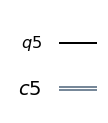

In [42]:
draw_circuit()

Tails Wins
Final Score| Heads: 41 Tails 59


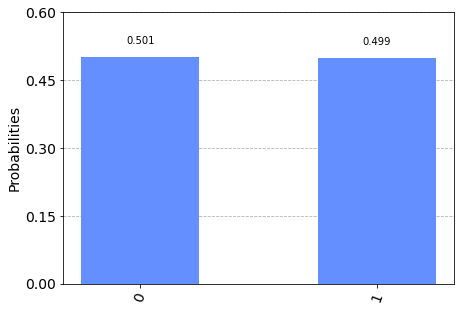

In [43]:
run_classical()

## Resources

- [Interactive visualize the Chi-Squared test](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)
- [Calculation of Chi-Squared test statistic](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)
- [Visualization of a confidence interval generated by R code](https://commons.wikimedia.org/wiki/File:Confidence-interval.svg)
- [Expected value of a squared standard normal](https://math.stackexchange.com/questions/264061/expected-value-calculation-for-squared-normal-distribution) (it's 1 - which is why the expected value of a Chi-Squared with $n$ degrees of freedom is $n$, as it's the sum of $n$ squared standard normals)